In [1]:
import numpy as np
import pandas as pd
import os
import imageio
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from skimage import transform
from skimage.color import rgb2gray, gray2rgb

In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory)
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f)
                      for f in os.listdir(label_directory)
                      if f.endswith(".ppm")]
        for f in file_names:
            # images.append(skimage.data.imread(f))
            # images.append(scipy.misc.imread(f))
            images.append(imageio.imread(f))
            labels.append(int(d))
    return images, labels

In [3]:
signs_names = ["Warning for a bad road surface", "Warning for a speed bump", "Warning for a slippery road surface",
               "Warning for a curve to the left", "Warning for a curve to the right",
               "Warning for a double curve, first left then right", "Warning for a double curve, first right then left",
               "Warning for children", "Warning for cyclists", "Warning for cattle on the road",
               "Warning for roadworks", "Warning for a traffic light", "Warning for a railroad crossing with barriers",
               "Warning for a danger with no specific traffic sign", "Warning for a road narrowing",
               "Warning for a road narrowing on the left", "Warning for a road narrowing on the right",
               "Warning for a crossroad side roads on the left and right", "Warning for an uncontrolled crossroad",
               "Give way to all drivers", "Give way to oncoming drivers", "Stop", "No entry for vehicular traffic",
               "Cyclists prohibited", "Vehicles heavier than indicated prohibited", "Trucks prohibited",
               "Vehicles wider than indicated prohibited", "Vehicles higher than indicated prohibited",
               "Road closed to all vehicles in both directions", "Turning left prohibited", "Turning right prohibited",
               "Overtaking prohibited", "Maximum speed limit", "Shared use path", "Proceed straight", "Turn left",
               "Proceed straight or turn right", "Roundabout", "Mandatory cycle-way",
               "Track only for cycles and pedestrians", "No parking", "No parking or standing",
               "No parking allowed between 1st - 15th days of the month",
               "No parking allowed between 16st - 131th days of the month", "Priority over oncoming vehicles",
               "Parking", "Parking for invalids", "Parking for cars", "Parking exclusively for lorries",
               "Parking exclusively for buses", "Parking only allowed on the sidewalk", "Begin of a residential area",
               "End of the residential area", "One-way traffic", "No exit", "End of road works",
               "Crossing for pedestrians", "Crossing for cyclists", "Indicating parking", "Speed bump",
               "End of the priority road", "Begin of a priority road"]

In [4]:

ROOT_PATH = "/kaggle/input"
train_data_dir = os.path.join(ROOT_PATH, "belgiumts-dataset/BelgiumTSC_Training/Training")
test_data_dir = os.path.join(ROOT_PATH, "belgiumts-dataset/BelgiumTSC_Testing/Testing")

train_images, train_labels = load_data(train_data_dir)
test_images, test_labels = load_data(test_data_dir)

In [5]:
train_images = [transform.resize(image, (28, 28)) for image in train_images]
test_images = [transform.resize(image, (28, 28)) for image in test_images]

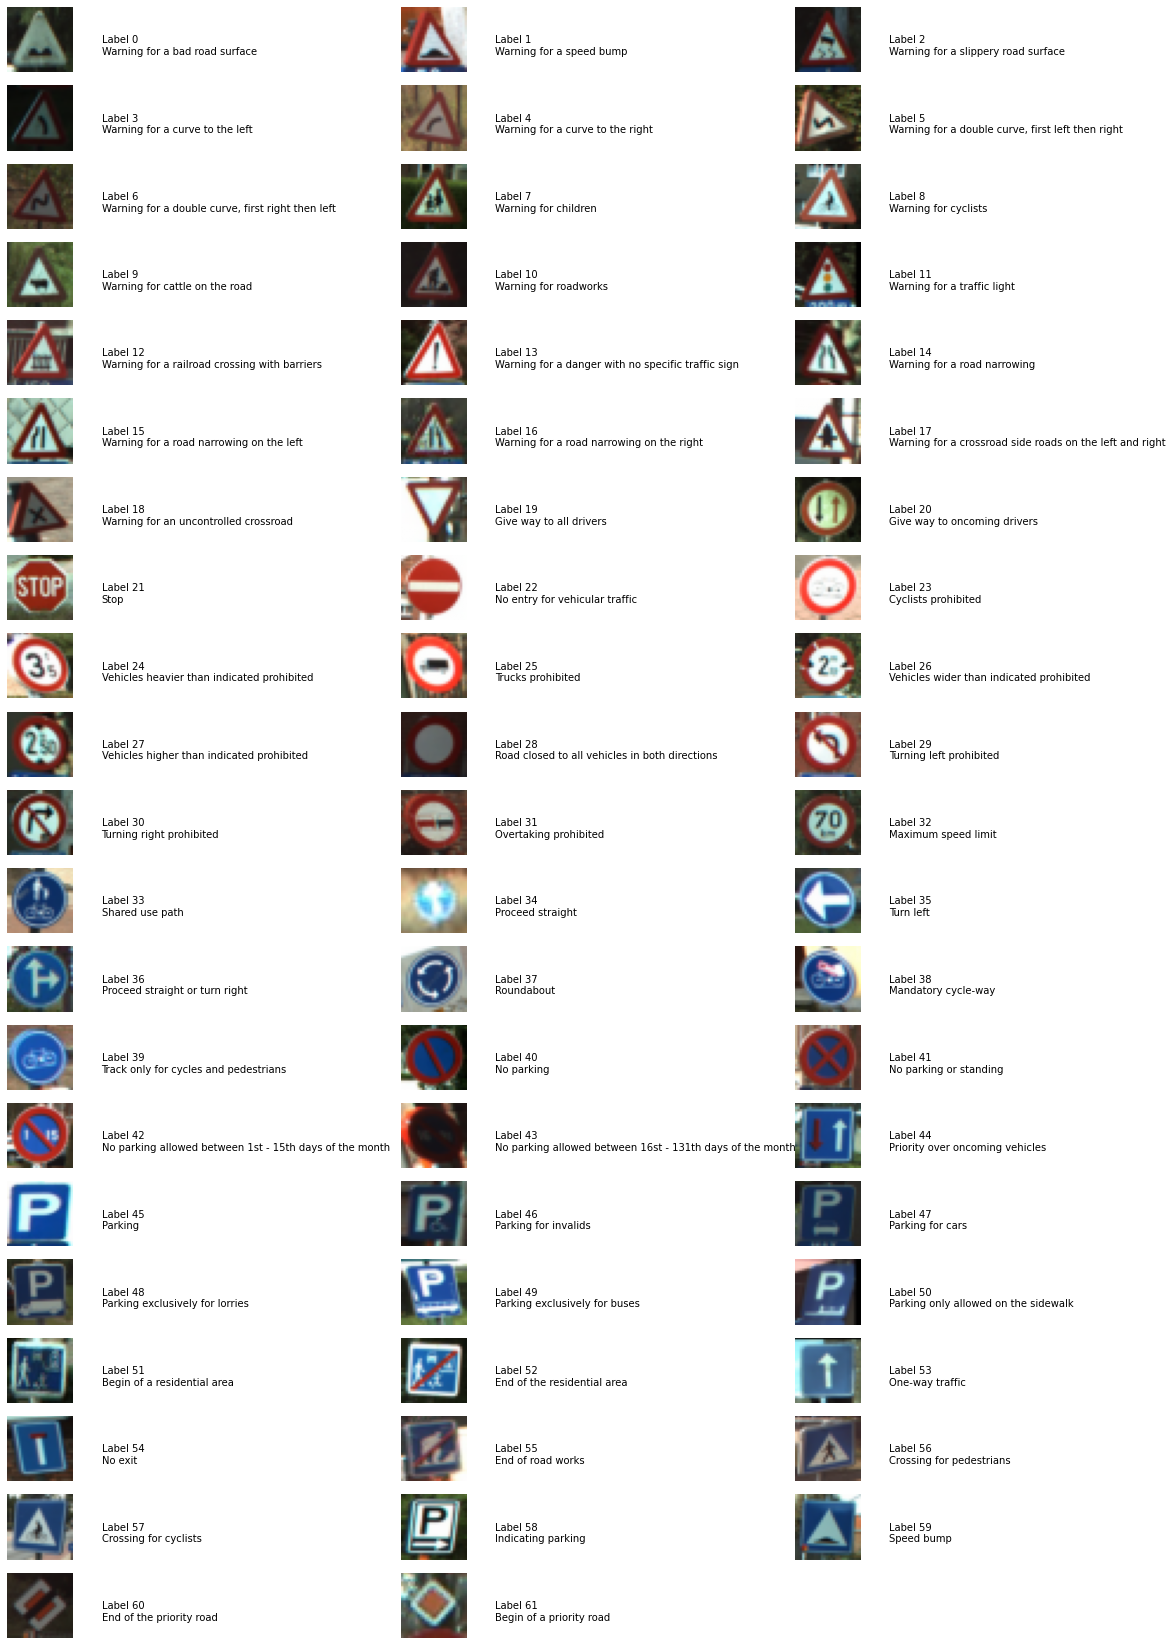

In [6]:
unique_labels = set(train_labels)
plt.figure(figsize=(20, 30))
i = 1
for label in unique_labels:
    # Pick the first image for each label.
    image = train_images[train_labels.index(label)]
    plt.subplot(21, 3, i)  # A grid of 8 rows x 8 columns
    plt.axis('off')
    plt.imshow(image)
    plt.text(40, 20, "Label {0} \n{1}".format(label, signs_names[label]))
    i += 1
plt.show()

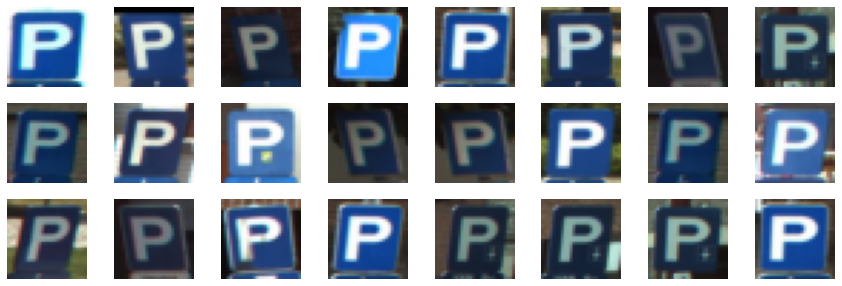

In [7]:
def display_label_images(images, label):
    """Display images of a specific label."""
    limit = 24  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1
    start = train_labels.index(label)
    end = start + train_labels.count(label)
    for image in train_images[start:end][:limit]:
        plt.subplot(3, 8, i)
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()
    
display_label_images(train_images, 45)

In [9]:
test_images = rgb2gray(np.array(test_images))
train_images = rgb2gray(np.array(train_images))

In [10]:
test_labels = np.array(test_labels)
train_labels = np.array(train_labels)

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=15)

Train on 4575 samples
Epoch 1/15
4575/4575 [==============================] - 2s 340us/sample - loss: 2.9272 - accuracy: 0.3554
Epoch 2/15
4575/4575 [==============================] - 0s 89us/sample - loss: 1.9074 - accuracy: 0.5880
Epoch 3/15
4575/4575 [==============================] - 0s 78us/sample - loss: 1.4350 - accuracy: 0.6802
Epoch 4/15
4575/4575 [==============================] - 0s 81us/sample - loss: 1.1536 - accuracy: 0.7416
Epoch 5/15
4575/4575 [==============================] - 0s 80us/sample - loss: 0.9529 - accuracy: 0.7858
Epoch 6/15
4575/4575 [==============================] - 0s 80us/sample - loss: 0.8158 - accuracy: 0.8153
Epoch 7/15
4575/4575 [==============================] - 0s 77us/sample - loss: 0.7150 - accuracy: 0.8354
Epoch 8/15
4575/4575 [==============================] - 0s 73us/sample - loss: 0.6336 - accuracy: 0.8518
Epoch 9/15
4575/4575 [==============================] - 0s 69us/sample - loss: 0.5666 - accuracy: 0.8726
Epoch 10/15
4575/4575 [=========

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print("Accuracy:", test_acc)                                   

2520/2520 [==============================] - 0s 80us/sample - loss: 0.5378 - accuracy: 0.8599
Accuracy: 0.8599206


In [15]:
prediction = model.predict(test_images)

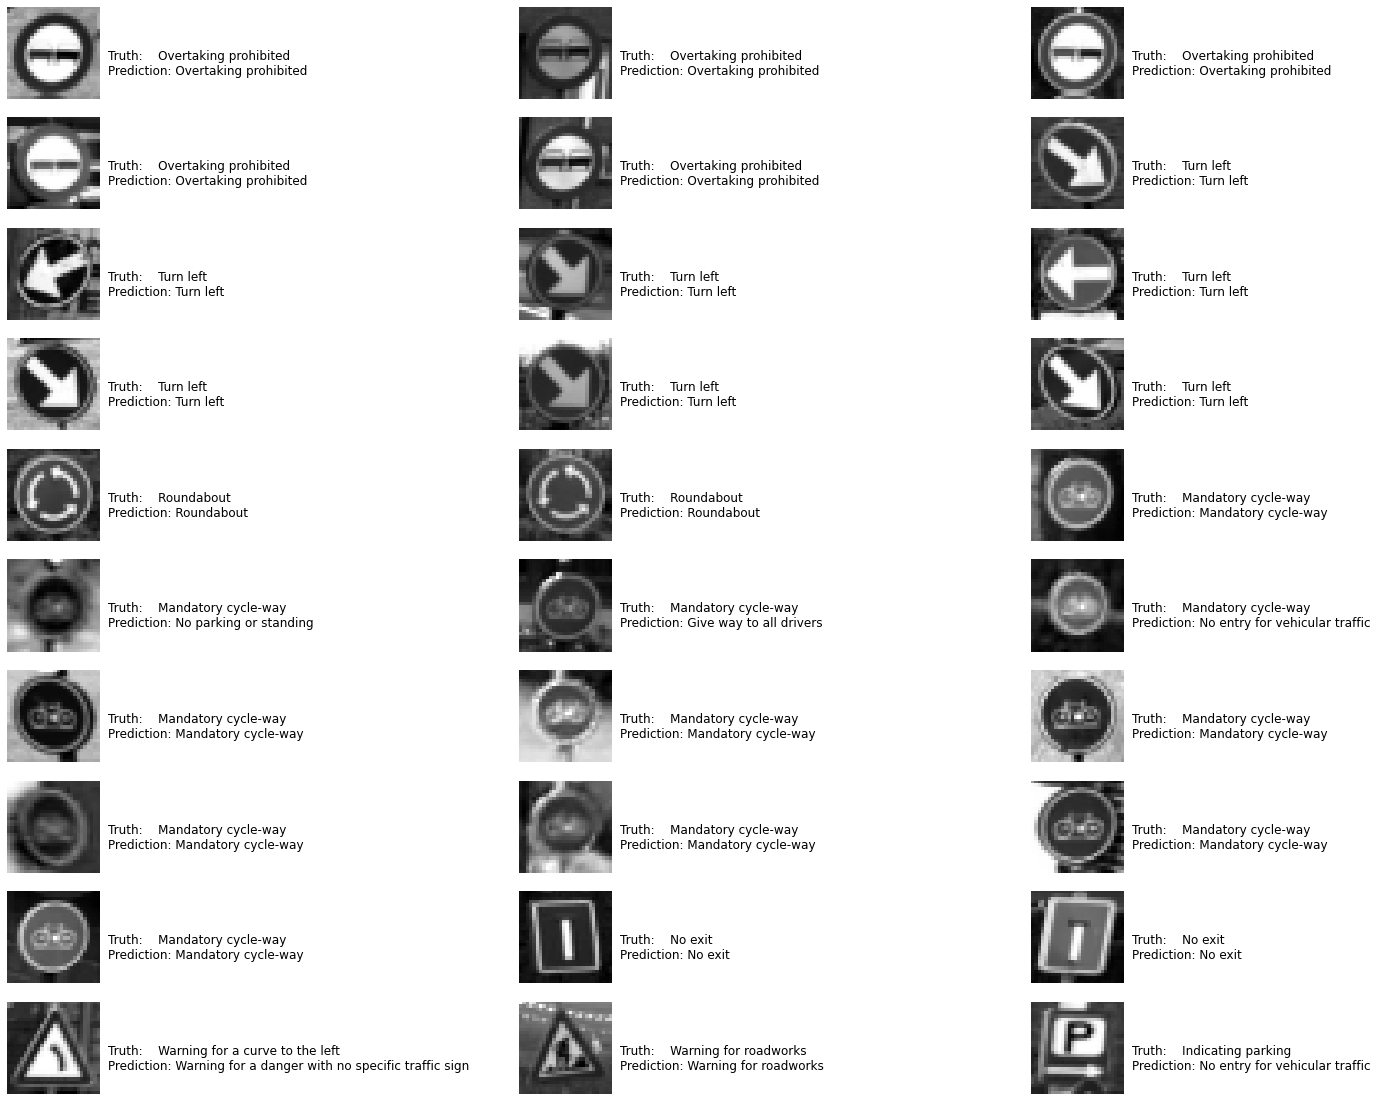

In [16]:
fig = plt.figure(figsize=(26, 20))
for i in range(0, 600, 20):
    plt.subplot(10, 3,1+i/20)
    plt.axis('off')
    plt.text(30, 20, "Truth:    {0}\nPrediction: {1}".format(signs_names[test_labels[i]], signs_names[np.argmax(prediction[i])]), 
             fontsize=12)
    plt.imshow(test_images[i],  cmap="gray")

plt.show()